In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"F:/Desktop/study.csv")
df.shape

(1000, 8)

In [4]:
#Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
#Duplicate values
df.duplicated()
df.nunique()


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [6]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
#define numerical & categorical values
numeric_feature = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype == "O"]

#print COLUMNS
print("We have {} numeric features: {}".format(len(numeric_feature), numeric_feature))
print("\nWe have {} categorical features: {}".format(len(categorical_feature), categorical_feature))

We have 3 numeric features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [9]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [10]:
#ADDING FEATURES TO CREATE " TOTAL_SCORE" & "AVG_SCORE"
df["Total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]	
df["Average_score"] = df["Total_score"]/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [11]:
reading_full = df[df["reading_score"] == 100]["Average_score"].count()
writing_full = df[df["writing_score"] == 100]["Average_score"].count()
Math_full = df[df["math_score"] == 100]["Average_score"].count()

print (f"Number of students with full marks in reading:  {reading_full}")
print (f"Number of students with full marks in writing:  {writing_full}")
print (f"Number of students with full marks in Math:  {Math_full}")

Number of students with full marks in reading:  17
Number of students with full marks in writing:  14
Number of students with full marks in Math:  7


In [12]:
reading_full = df[df["reading_score"] <= 20]["Average_score"].count()
writing_full = df[df["writing_score"] <= 20]["Average_score"].count()
Math_full = df[df["math_score"] <= 20]["Average_score"].count()

print (f"Number of students with less than 20 marks in reading:  {reading_full}")
print (f"Number of students with less than 20 marks in writing:  {writing_full}")
print (f"Number of students with less than 20 marks in Math:  {Math_full}")

Number of students with less than 20 marks in reading:  1
Number of students with less than 20 marks in writing:  3
Number of students with less than 20 marks in Math:  4


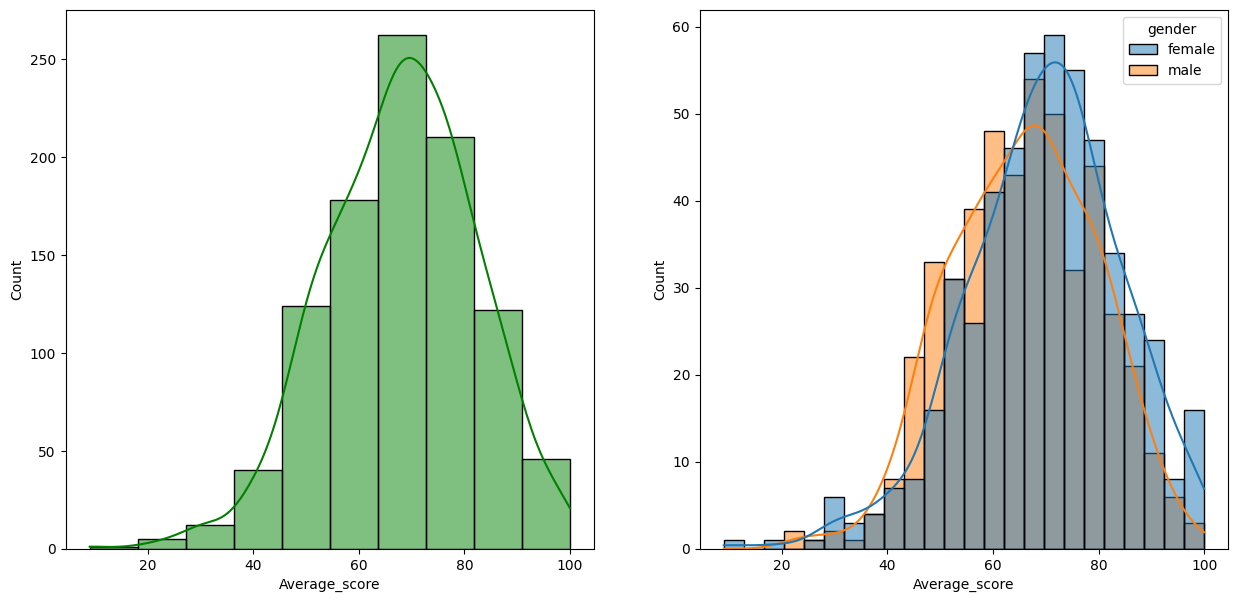

In [13]:
#DATA VISUALIZATION

fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='Average_score', bins=10, kde=True, color='g')#bins = NO. OF bars


plt.subplot(122)
sns.histplot(data=df, x='Average_score', kde=True, hue= "gender")# hue is use to create diff categories in feature using diff COLOUR.
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

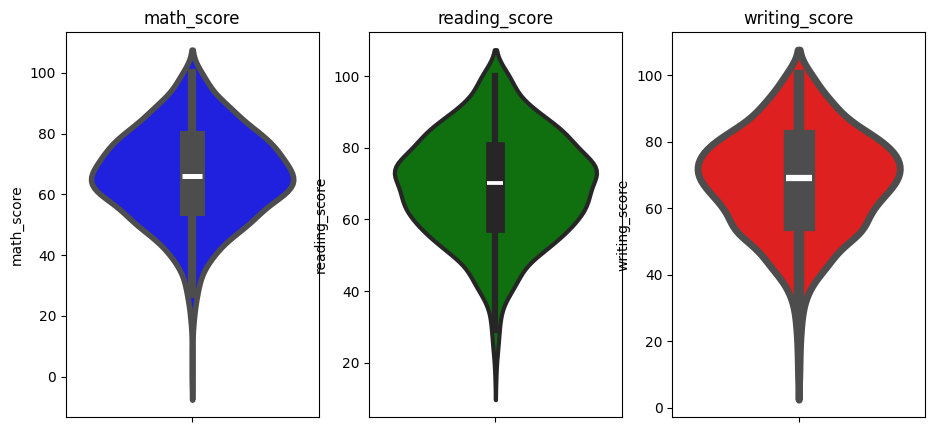

In [14]:
"""plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()"""


plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.title('math_score')
sns.violinplot(data=df, y = 'math_score', color = 'blue', linewidth= 4)
plt.subplot(1, 4, 2)
plt.title('reading_score')
sns.violinplot(data=df, y = 'reading_score', color = 'green', linewidth= 3)
plt.subplot(1, 4, 3)
plt.title('writing_score')
sns.violinplot(data=df, y = 'writing_score', color = 'red', linewidth= 5)
plt.show



In [15]:
df['test_preparation_course']

0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test_preparation_course, Length: 1000, dtype: object

(-1.25, 1.25, -1.25, 1.25)

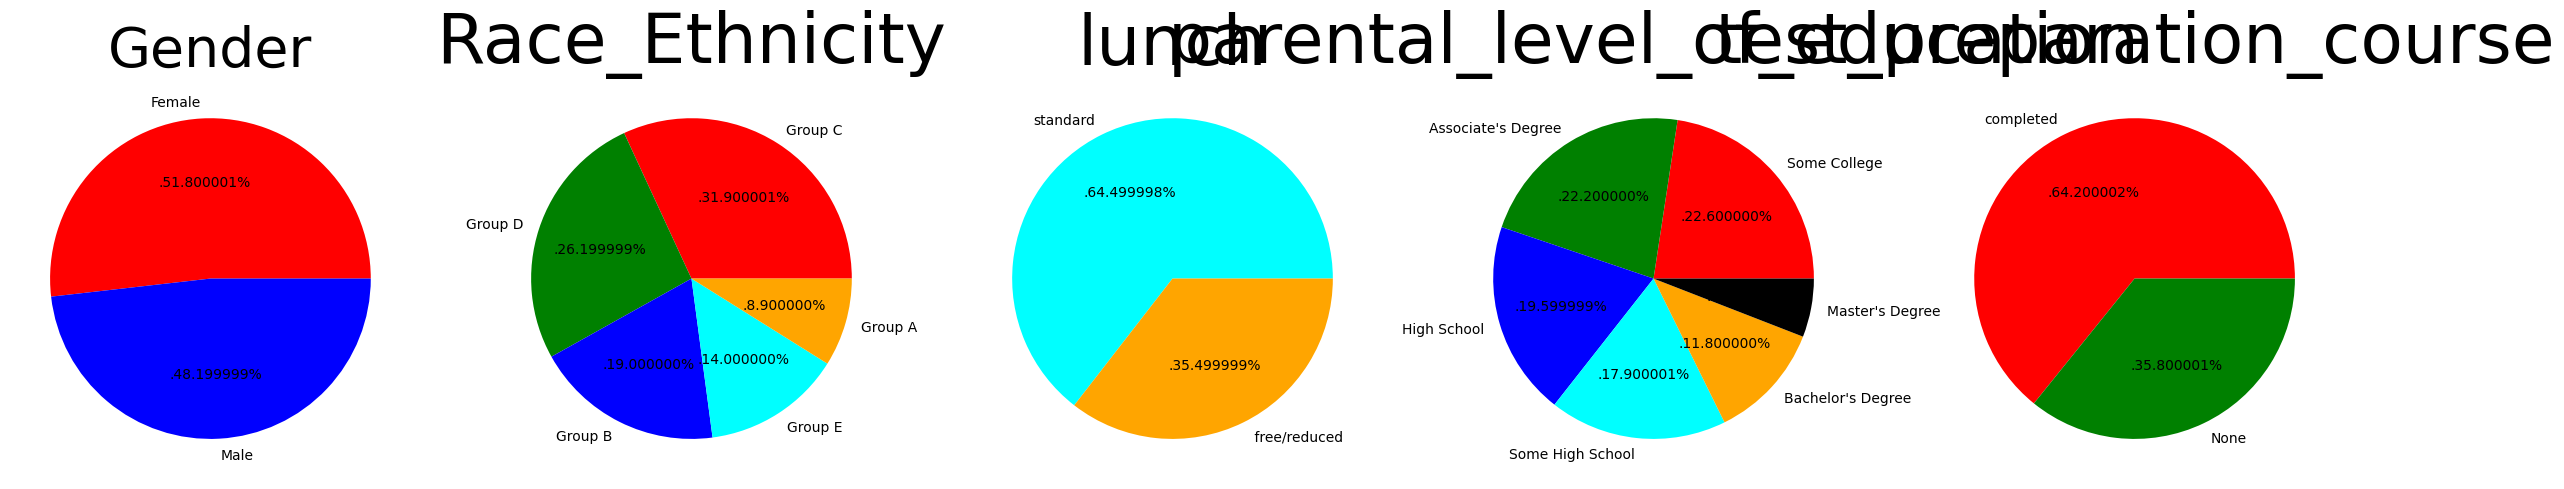

In [16]:
#Multivariate analysis using pieplot


plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = [ 'red', 'blue']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize =40)
plt.axis("on")




plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 50)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'standard', ' free/reduced'
color = ['cyan','orange']

plt.pie(size, colors = color, labels = labels ,autopct = '.%2f%%')
plt.title('lunch', fontsize = 50)
plt.axis('off')



plt.subplot(1, 5, 4)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange', 'black']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('parental_level_of_education', fontsize = 50)
plt.axis('off')



plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels = 'completed', 'None'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('test_preparation_course', fontsize = 50)
plt.axis('off')



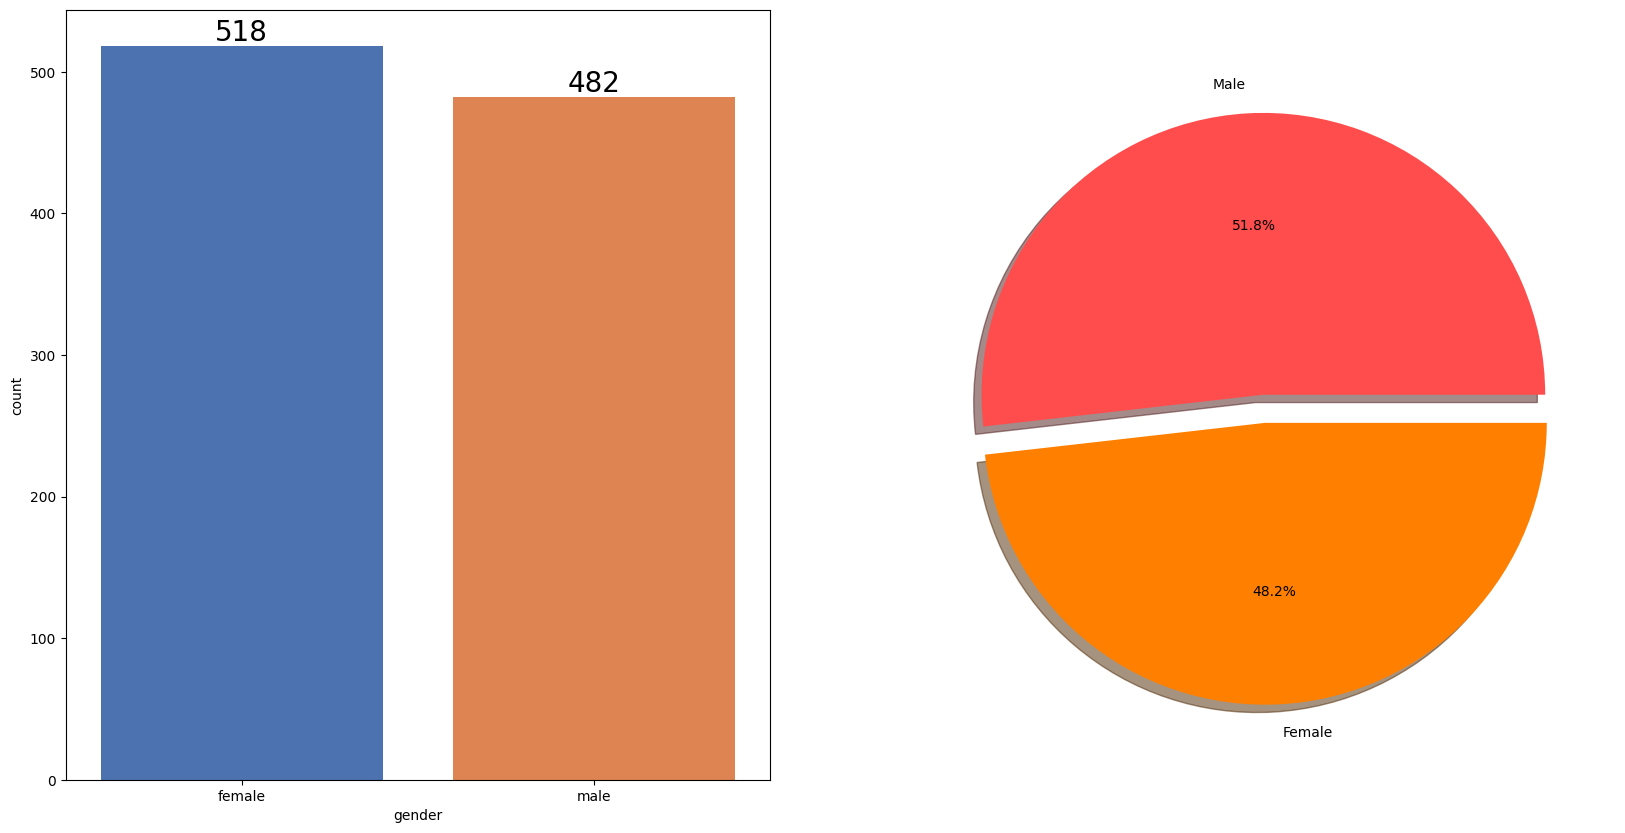

In [17]:
#GENDER COLUMN
#How is distribution of Gender ?

#f,ax=plt.subplots(1,2,figsize=(20,10))
#sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=1)



f, ax= plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'], data = df, palette= 'deep',ax = ax[0], saturation= 1)
for container in ax[0].containers:
 ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [19]:
gender_group = df.groupby('gender').size()
gender_group

gender
female    518
male      482
dtype: int64

In [23]:
plt.figure(figsize=(10, 8))

#X = ['Total Average','Math Average']


female_scores = [gender_group[0], gender_group['math_score'][0]]
male_scores = [gender_group[1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

KeyError: 'math_score'

<Figure size 1000x800 with 0 Axes>

In [24]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


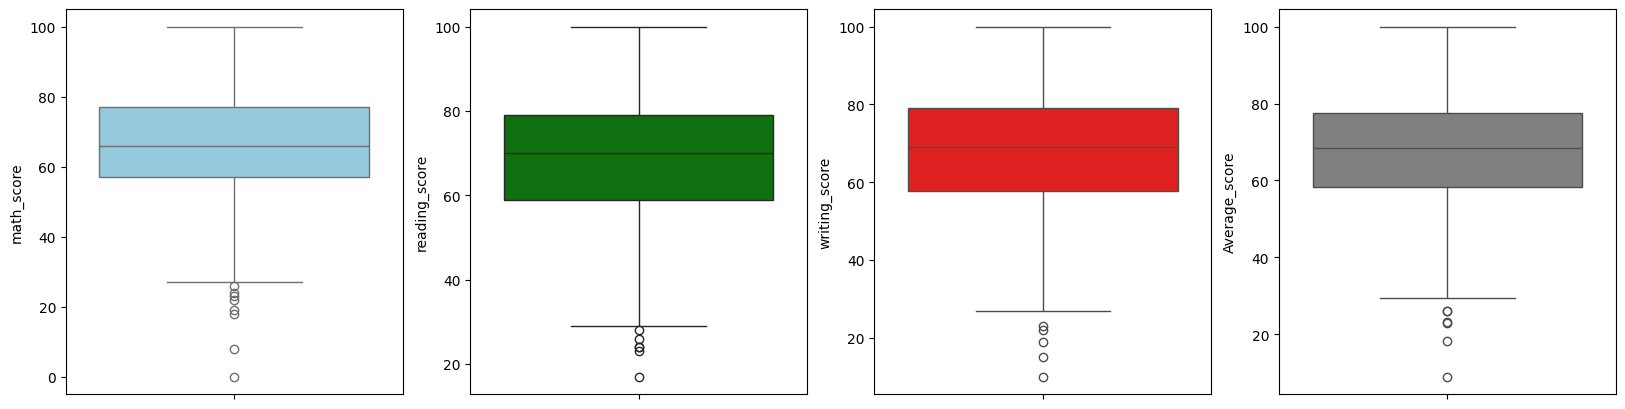

In [32]:
# CHECKING OUTLIERS

plt.subplots(1,4, figsize=(20, 5))
plt.subplot(141)
sns.boxplot(data = df['math_score'], color='skyblue')
plt.subplot(142)
sns.boxplot(data = df['reading_score'], color='green')
plt.subplot(143)
sns.boxplot(data = df['writing_score'], color='red')
plt.subplot(144)
sns.boxplot(data = df['Average_score'], color='gray')
plt.show()

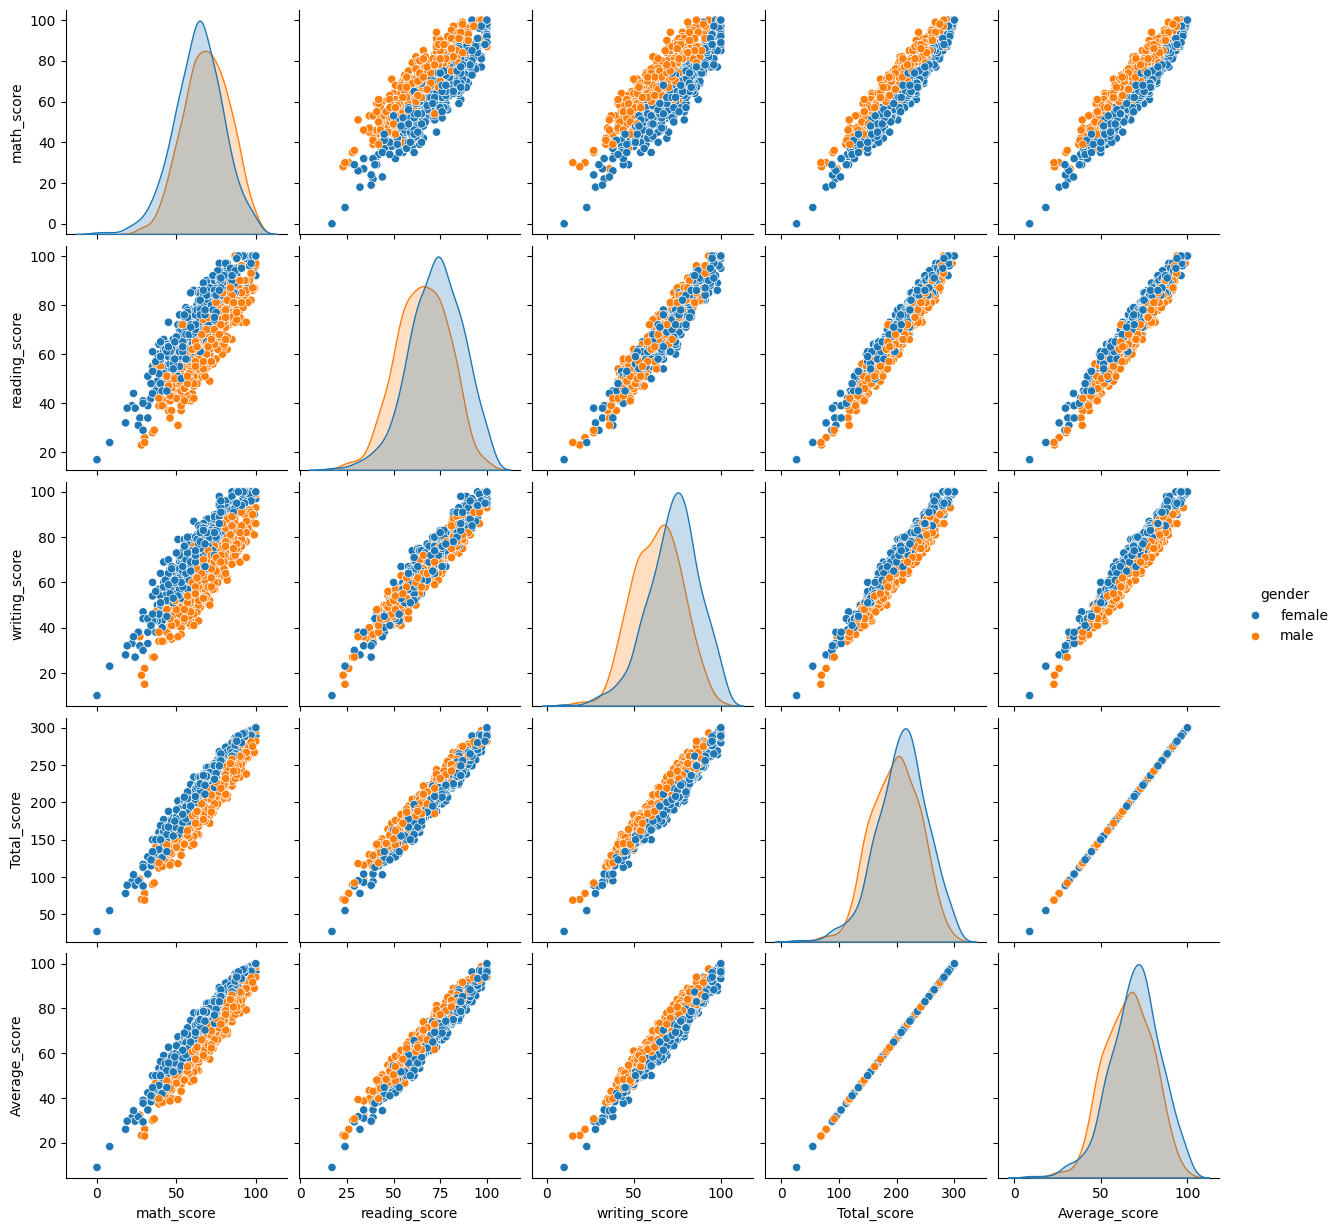

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()